# FIT5201 Data analysis algorithms S1 2019 
# Assignment 1
#### Student Name: Nisheeth Shah
#### Student ID: 29599644
#### Email Id: nsha0020@student.monash.edu

Date: 04/04/2019

Environment: R version 3.4.3. <br>
Libraries used:
- reshape2
- ggplot2
- corrplot

# Section A. Model Complexity and Model Selection
## Question 1: K-Nearest Neighbour (KNN) Regressor 
    I. Implement the KNN Regressor function: knn(train.data, train.label, test.data, K=3)
    II. Plot the training and the testing errors versus 1/K for K=1,..,20 in one plot 
    III. Report the optimum value for K in terms of the testing error; whether corresponding to underfitting or overfitting

### Importing libraries

In [32]:
library(reshape2)
library(ggplot2)
library(corrplot)

### Read train and test datasets

In [33]:
# Read the csv files
train.data <- read.csv("Task1A_train.csv") 
test.data <- read.csv("Task1A_test.csv")  

# Seeting our data and labels seperately to easily access them further
train.label <- train.data[2]
train.data <- train.data[1]
test.label <- test.data[2]
test.data <- test.data[1]

# Having a look at first few rows
head(train.label)
head(train.data)
head(test.label)
head(test.data)

y
0.71
0.85
0.61
0.92
0.72
0.92


x1
1960.0
1960.5
1961.0
1961.5
1962.0
1962.5


y
0.63
0.44
0.69
0.55
0.77
0.60


x1
1960.25
1960.75
1961.25
1961.75
1962.25
1962.75


### I. KNN Regressor function

knn(train.data, train.label, test.data, K=3) which takes the training data and their labels (continuous values), the test set, and the size of the neighborhood (K). It returns the regressed values for the test data points. When choosing the neighbors, we use the Euclidean distance function to measure the distance between a pair of data points.

In [34]:
# Defining KNN Regressor function

knn <- function(train.data, train.label, test.data, K=3){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## mehod for calulating distance     
    distance = 'euclidean'
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method = distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate the predicted labels according to the majority vote
        test.label[i,]<- (mean(train.label[nn,]))
    }
    
    ## return the class labels as output
    return (test.label)
}

In [35]:
# let see what is the prediciton of our knn for test samples when K=3
head(knn(train.data, train.label,test.data, K=3))

y
0.7233333
0.7233333
0.7933333
0.7500000
0.8533333
0.8233333


### Calculating the Test Errors
By using  mean square error.

In [36]:
# calculate the train and test missclassification rates for K in 1:20
# THIS MAY TAKE A FEW MINUTES TO COMPLETE!
error <- data.frame('K'=1:20, 'train'=rep(0,20), 'test'=rep(0,20))
for (k in 1:20){
    error[k,'train'] <- sum((knn(train.data, train.label, train.data, K=k) - train.label) ^ 2)/nrow(train.data)
    error[k,'test'] <-  sum((knn(train.data, train.label, test.data, K=k)  - test.label)^2)/nrow(test.data)
}

# Lets print the value of k which gives minimum test error
which(error[,3]==min(error[,3]))

[1] 11

### II. Plot the training and the testing errors versus 1/K for K=1,..,20

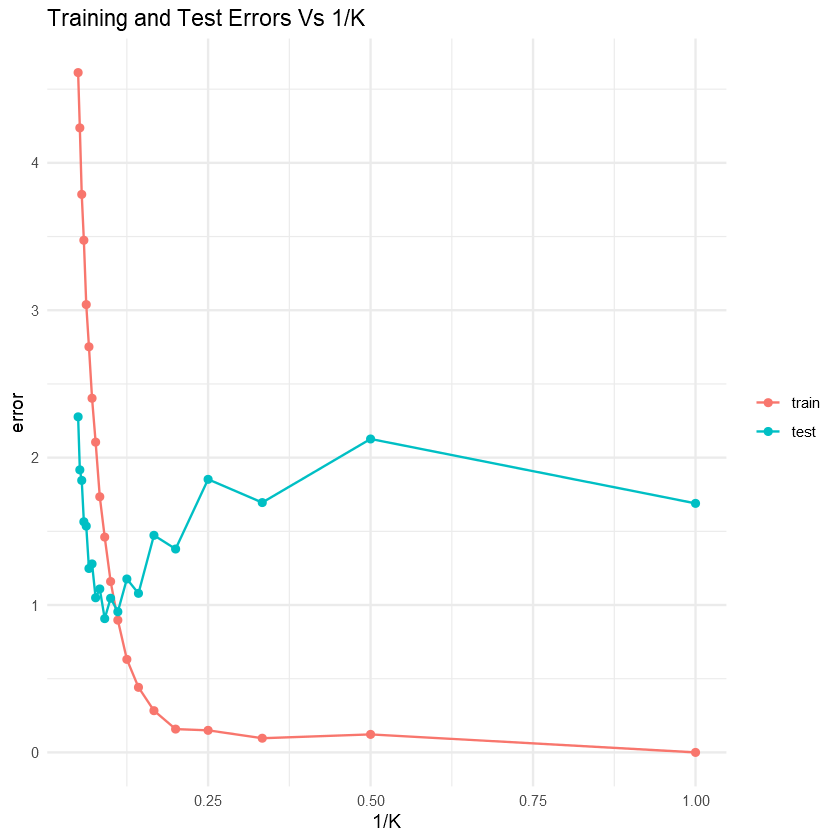

In [37]:
# plot errors for train and test data sets against 1/K

error.m <- melt(error, id='K') # reshape for visualization
names(error.m) <- c('K', 'type', 'error')
ggplot(data=error.m, aes(x=1/K, y=error, color=type)) + geom_line() + geom_point() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Training and Test Errors Vs 1/K")

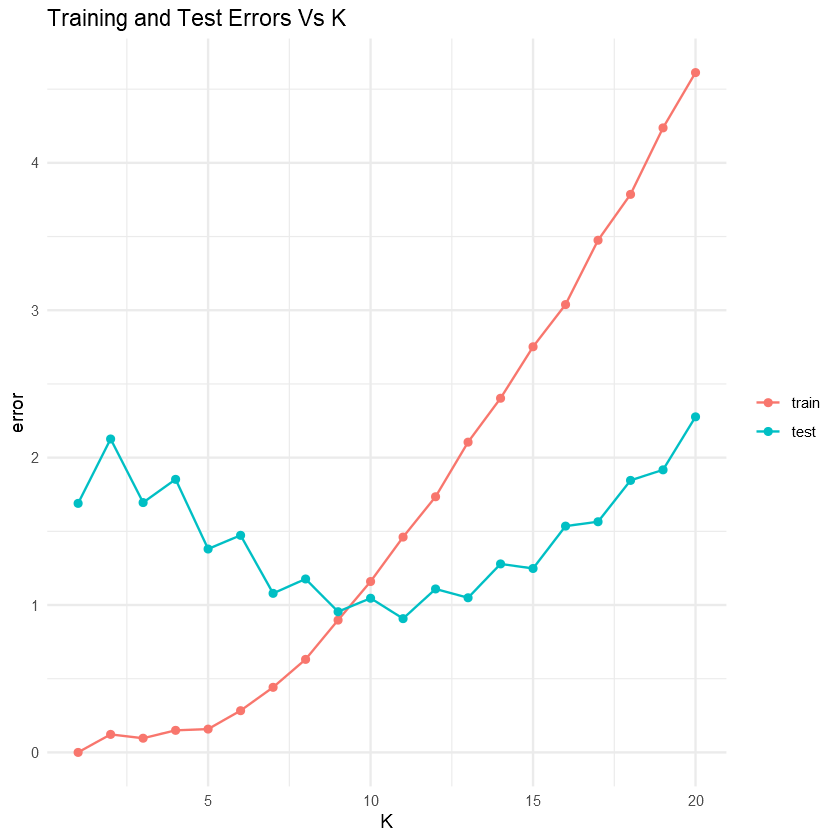

In [38]:
ggplot(data=error.m, aes(x=K, y=error, color=type)) + geom_line() + geom_point() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Training and Test Errors Vs K")

### III. Discussion

By KNN regressor, we see how well our model is based on the training data. We use MSE to find k. The value of k is optimum whehnthe testing error is minimum. We found minimum testing error when k=11 is optimum value.

Underfitting and Overfitting:
In overfitting, training error decrease and model includes noise. This results in increase in value of k <br>
Wherease in underfitting, its vice versa. <br>
From above plot, K > 10 underfits the data.